In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns
import time

%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/jay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweets = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names = ['label','id','date','noquery','handler','tweet'])

In [3]:
tweets.head()

,label,id,date,noquery,handler,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets[tweets['handler']=='jtmal0723']

,label,id,date,noquery,handler,tweet
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm
500,0,1467936498,Mon Apr 06 22:53:39 PDT 2009,NO_QUERY,jtmal0723,@Anistorm Sorry
1733,0,1468219521,Tue Apr 07 00:22:07 PDT 2009,NO_QUERY,jtmal0723,@jmielcarz send some of that warmness my way.....
37902,0,1573108534,Mon Apr 20 23:45:17 PDT 2009,NO_QUERY,jtmal0723,@Anistorm what's wrong?
261409,0,1985909023,Sun May 31 18:00:15 PDT 2009,NO_QUERY,jtmal0723,likes that it is windy at work so he isn't as ...
606365,0,2222571467,Thu Jun 18 07:09:49 PDT 2009,NO_QUERY,jtmal0723,@twckellycass the light at the video wall is r...
866347,4,1677596948,Sat May 02 02:57:06 PDT 2009,NO_QUERY,jtmal0723,"@TWCWeekends Happy 27th birthday, you guys"
1288967,4,2002549306,Tue Jun 02 04:31:54 PDT 2009,NO_QUERY,jtmal0723,@YourWxToday other than a few burnt out lights...


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
label      1600000 non-null int64
id         1600000 non-null int64
date       1600000 non-null object
noquery    1600000 non-null object
handler    1600000 non-null object
tweet      1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
tweets.drop(['id', 'date','noquery','handler'], axis=1, inplace=True)

In [7]:
tweets.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
tweets.groupby('label').describe()

tweet                                        
        count  unique                        top freq
label                                                
0      800000  790185  isPlayer Has Died! Sorry   210
4      800000  793506              good morning   118

In [9]:
tweets['length'] = tweets['tweet'].apply(len)
tweets.head()

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [10]:
tweets['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [11]:

tweets['label'] = tweets['label'].map({0: 0, 4: 1})

In [12]:
tweets.length.describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: length, dtype: float64

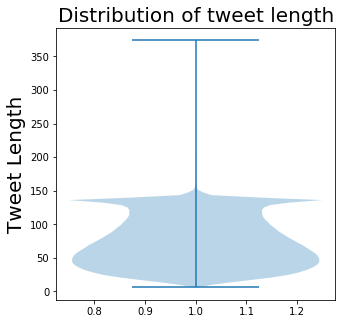

In [379]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.violinplot(tweets['length'])
ax.set_ylabel('Tweet Length',fontsize = 20)
plt.title('Distribution of tweet length', fontsize = 20)
plt.show()

In [14]:
tweets[tweets['length'] == 374]['tweet']

1295281    @catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...
Name: tweet, dtype: object

In [372]:
tweets_temp_0 = tweets[tweets['label']==0]
tweets_temp_1 = tweets[tweets['label']==1]

Text(0.5,1,'Negative Tweets')

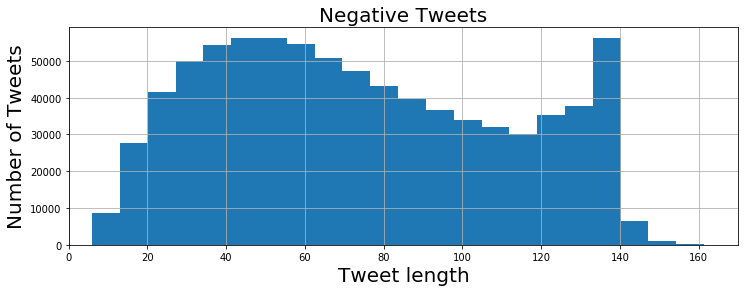

In [377]:
tweets_temp_0.hist(column='length', bins=50,figsize=(12,4))
plt.xlabel('Tweet length', fontsize = 20)
plt.ylabel('Number of Tweets', fontsize = 20)
plt.xlim((0,170))
plt.title('Negative Tweets', fontsize = 20)


(0, 170)

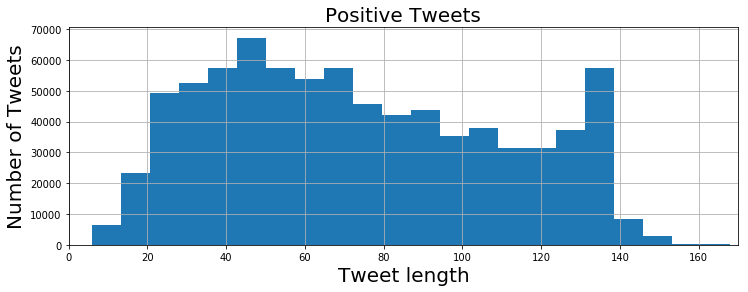

In [378]:
tweets_temp_1.hist(column='length', bins=50,figsize=(12,4))
plt.xlabel('Tweet length', fontsize = 20)
plt.ylabel('Number of Tweets', fontsize = 20)
plt.title('Positive Tweets', fontsize = 20)
plt.xlim((0,170))

In [16]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup
import re

In [17]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    from nltk.stem import WordNetLemmatizer
    lemmer=WordNetLemmatizer()
    words=[' '.join([lemmer.lemmatize(word) for word in text.split(' ')]) for text in words]
    return (" ".join(words)).strip()

In [18]:
%%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(tweets)):
    if( (i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" %(i+1,len(tweets)))                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(tweets['tweet'][i]))

Cleaning the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed
CPU times: user 11min 39s, sys: 28.7 s, total: 12min 8s
Wall time: 12min 10s


In [19]:
len(clean_tweet_texts)

1600000

In [20]:
clean_tweets = pd.DataFrame(clean_tweet_texts,columns=['clean tweet'])
clean_tweets['label'] = tweets['label']

In [21]:
clean_tweets['label'].value_counts()

1    800000
0    800000
Name: label, dtype: int64

In [22]:
clean_tweets.to_csv('clean_tweet.csv',encoding='utf-8')

In [23]:
csv = 'clean_tweet.csv'
clean_tweets = pd.read_csv(csv,index_col=0)
clean_tweets.head()

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,clean tweet,label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many time for the ball managed to save t...,0
3,my whole body feel itchy and like it on fire,0
4,no it not behaving at all mad why am here beca...,0


In [24]:
clean_tweets.head()

,clean tweet,label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many time for the ball managed to save t...,0
3,my whole body feel itchy and like it on fire,0
4,no it not behaving at all mad why am here beca...,0


In [25]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [26]:
clean_tweets[clean_tweets.isnull().any(axis=1)].head()

,clean tweet,label
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [27]:
np.sum(clean_tweets.isnull().any(axis=1))

3959

In [28]:
clean_tweets.isnull().any(axis=0)

clean tweet     True
label          False
dtype: bool

It seems like 3,959 entries have null entries for the text column. This is strange, because the original dataset had no null entries, and if there are any null entries in the cleaned dataset, it must have happened during the cleaning process.

In [29]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding = 'latin-1',header=None)
df.iloc[clean_tweets[clean_tweets.isnull().any(axis=1)].index,:].head()

,0,1,2,3,4,5
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
282,0,1467881474,Mon Apr 06 22:38:20 PDT 2009,NO_QUERY,__Susan__,@ITS_NEMESIS -------
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm


By looking at these entries in the original data, it seems like only text information they had was either twitter ID or it could have been URL address. Anyway, these are the info we decided to discard for the sentiment analysis, so we will drop these null rows, and update the data frame.

In [30]:
clean_tweets.dropna(inplace=True)
clean_tweets.reset_index(drop=True,inplace=True)
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [31]:
clean_tweets['label'].value_counts()

0    798197
1    797844
Name: label, dtype: int64

Text(0.5,1,'Balanced data set')

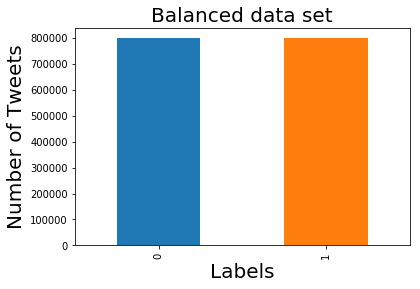

In [381]:
clean_tweets['label'].value_counts().plot(kind = 'bar')
plt.xlabel('Labels', fontsize = 20)
plt.ylabel('Number of Tweets', fontsize = 20)
plt.title('Balanced data set', fontsize = 20)

In [33]:
clean_tweets['length'] = clean_tweets['clean tweet'].apply(len)

In [34]:
clean_tweets.length.describe() #max is 140 now

count    1.596041e+06
mean     5.928591e+01
std      3.245402e+01
min      1.000000e+00
25%      3.200000e+01
50%      5.500000e+01
75%      8.500000e+01
max      1.400000e+02
Name: length, dtype: float64

Text(0.5,1,'After Preprocessing')

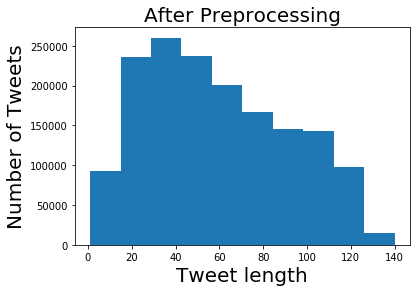

In [380]:
clean_tweets['length'].plot(kind='hist')
plt.xlabel('Tweet length', fontsize = 20)
plt.ylabel('Number of Tweets', fontsize = 20)
plt.title('After Preprocessing', fontsize = 20)

## Word Cloud
A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement.Some of the concerns over word cloud is that, it supports only the crudest sorts of textual analysis, and it is often applied to situations where textual analysis is not appropriate, and it leaves viewers to figure out the context of the data by themselves without providing the narrative.

But in the case of tweets, textual analysis is the most important analysis, and it provides a general idea of what kind of words are frequent in the corpus, in a sort of quick and dirty way.

In [36]:
neg_tweets = clean_tweets[clean_tweets['label'] == 0]
neg_string = []
for t in neg_tweets['clean tweet']:
     neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

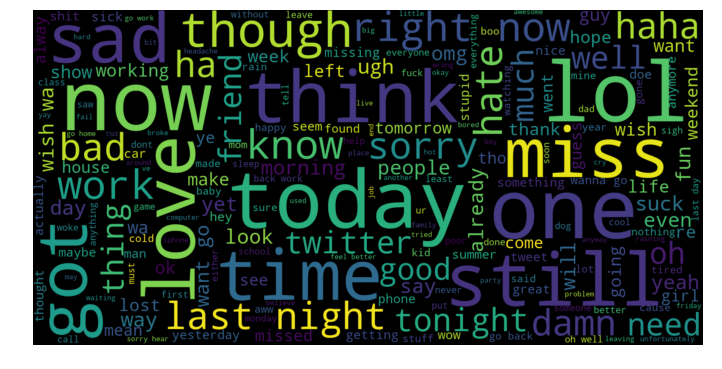

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some of big words can be interpreted quite neutral, such as “today”,”now”,etc. We can see some of the words in smaller size make sense to be in negative tweets, such as “damn”,”ugh”,”miss”,”bad”, etc. But there is “love” in rather big size, so we wanted to see what is happening.

In [38]:
for t in tweets[tweets['label']==0]['tweet'][:200]:
    if 'love' in t:
        print(t)

@LettyA ahh ive always wanted to see rent  love the soundtrack!!
@julieebaby awe i love you too!!!! 1 am here  i miss you
@mercedesashley Damn! The grind is inspirational and saddening at the same time.  Don't want you to stop cuz I like what u do! Much love
I'm missing you babe..  but as long as your alive I'm happy.. Yawwwnn.. I'm tired my love imma try to sleep hopefully you had a headstart
@robluketic  love the french. I tell people here in the south i'm qtr. french and they snarl at me.  french are beautiful people


Even though the tweets contain the word “love”, in these cases it is negative sentiment, because the tweet has mixed emotions like “love” but “miss”. Or sometimes used in a sarcastic way.

In [39]:
pos_tweets = clean_tweets[clean_tweets['label'] == 1]
pos_string = []
for t in pos_tweets['clean tweet']:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

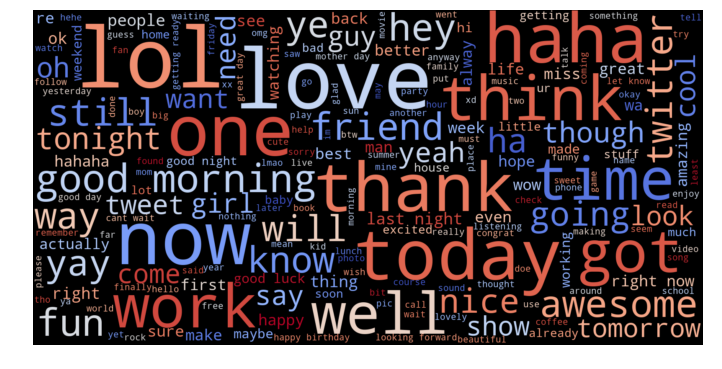

In [40]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap= 'coolwarm').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
from sklearn.utils import shuffle
clean_tweets = shuffle(clean_tweets)

In [42]:
clean_tweets.head()
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596041 entries, 1317563 to 1452463
Data columns (total 3 columns):
clean tweet    1596041 non-null object
label          1596041 non-null int64
length         1596041 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ MB


## Preparion for data visualisation
In order to implement a couple of data visualisation in the next step, We need term frequency data. What kind of words are used in the tweets, and how many times it is used in entire corpus. We used count vectorizer to calculate the term frequencies.

There are parameter options available for count vectorizer, such as removing stop words, limiting the maximum number of terms. However, in order to get a full picture of the dataset first.

## Here, We implemented with stop words included, and not limiting the maximum number of features.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(clean_tweets['clean tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [44]:
len(cvec.get_feature_names()) #count vectorizer has extracted 253020 words out of the corpus

253020

In [45]:
neg_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 0]['clean tweet'])
pos_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 1]['clean tweet'])
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [46]:
term_freq_df.head()

,0,1
aa,161,96
aaa,94,56
aaaa,45,29
aaaaa,26,12
aaaaaa,16,12


In [47]:
term_freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253020 entries, aa to zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
Data columns (total 2 columns):
0    253020 non-null int64
1    253020 non-null int64
dtypes: int64(2)
memory usage: 5.8+ MB


In [48]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
it,182969,167030,349999
my,190775,125955,316730
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115614,101223,216837
for,98999,117369,216368


In [49]:
len(term_freq_df)

253020

Text(0.5,1,'Top 200 tokens in tweets')

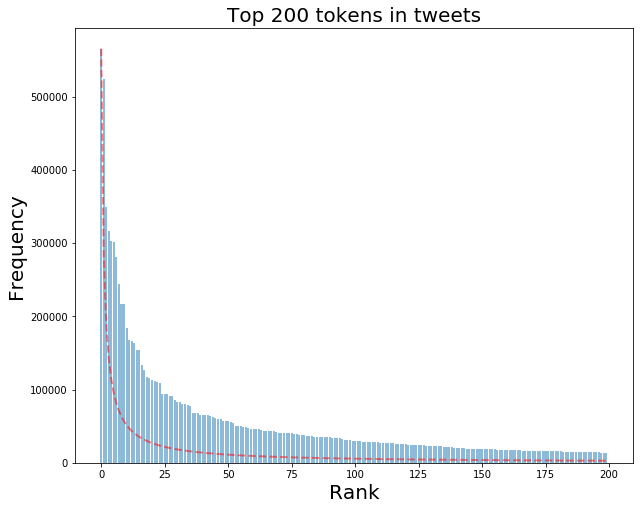

In [348]:
y_pos = np.arange(200)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:200], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Rank', fontsize = 20)
plt.title('Top 200 tokens in tweets', fontsize = 20)

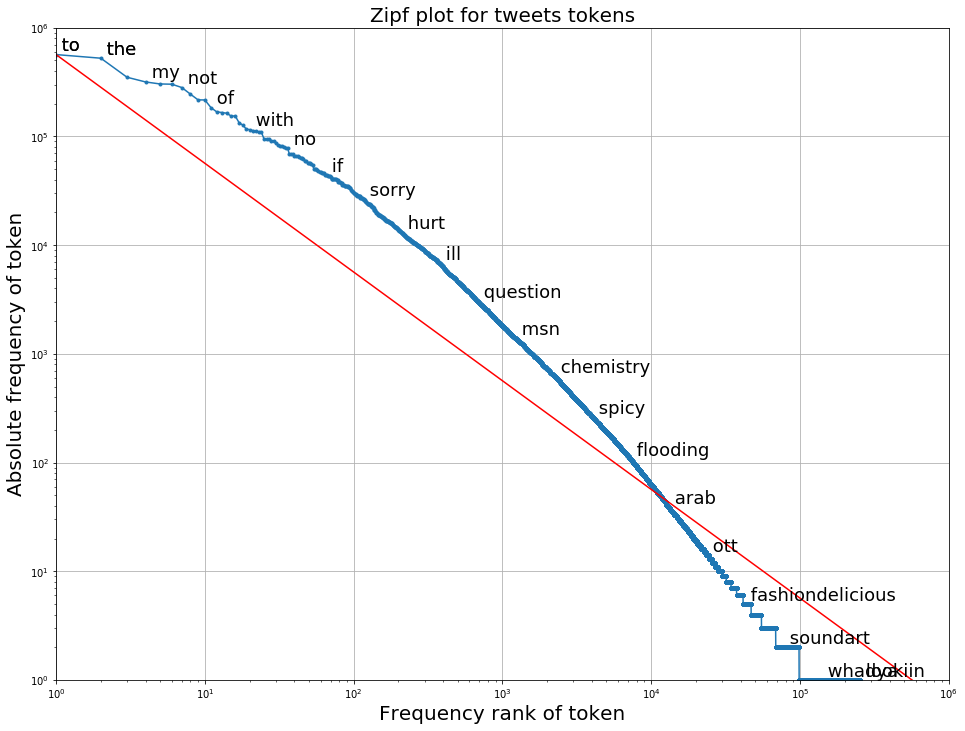

In [347]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(16,12))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens", fontsize = 20)
xlabel("Frequency rank of token", fontsize = 20)
ylabel("Absolute frequency of token", fontsize = 20)
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 24).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], verticalalignment="bottom", horizontalalignment="left", fontsize=18)


## Now, We implemented without stop words, and limiting the maximum number of features to 10000
This time, the stop words will not help much, because of the same high-frequency words, such as "the", "to", will equally frequent in both classes. If these stop words dominate both of the classes, We won't be able to have a meaningful result.

In [52]:
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(clean_tweets['clean tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [53]:
neg_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 0]['clean tweet'])
pos_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 1]['clean tweet'])
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [54]:
term_freq_df2.head()

,0,1
aa,161,96
aaa,94,56
aaaa,45,29
aaaaah,35,31
aaaah,76,61


In [55]:
term_freq_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, aa to zzzzzz
Data columns (total 2 columns):
0    10000 non-null int64
1    10000 non-null int64
dtypes: int64(2)
memory usage: 234.4+ KB


In [56]:
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
just,64004,62944,126948
wa,63108,47277,110385
day,52151,56920,109071
good,29251,62189,91440
like,41534,38365,79899
today,38362,30341,68703
work,46946,21698,68644
love,17825,50404,68229
time,31417,34370,65787
going,33690,30942,64632


In [57]:
df_sample100k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample80k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample60k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample10000 = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

In [58]:
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [59]:
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [60]:
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [61]:
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Null Accuracy (Baseline Model)

## Sample of 10,000 datapoints

In [62]:
clean_tweets_sample10000 = clean_tweets.sample(n=10000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.5126666666666667


In [63]:
clean_tweets_sample10000['label'].value_counts()

1    5085
0    4915
Name: label, dtype: int64

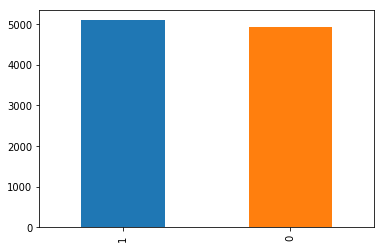

In [64]:
clean_tweets_sample10000['label'].value_counts().plot(kind  = 'bar')

## Sample of 60k datapoints

In [65]:
clean_tweets_sample60k = clean_tweets.sample(n=60000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.507


In [66]:
clean_tweets_sample60k['label'].value_counts()

0    30020
1    29980
Name: label, dtype: int64

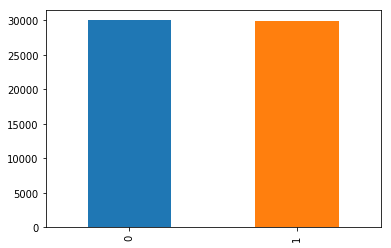

In [67]:
clean_tweets_sample60k['label'].value_counts().plot(kind  = 'bar')

## Sample of 80k datapoints

In [68]:
clean_tweets_sample80k = clean_tweets.sample(n=80000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.494375


In [69]:
clean_tweets_sample80k['label'].value_counts()

0    40004
1    39996
Name: label, dtype: int64

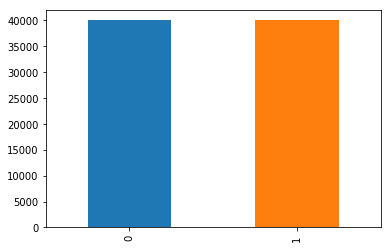

In [70]:
clean_tweets_sample80k['label'].value_counts().plot(kind  = 'bar')

## Sample of 100k datapoints

In [71]:
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.5009333333333333


In [72]:
clean_tweets_sample100k['label'].value_counts()

1    50126
0    49874
Name: label, dtype: int64

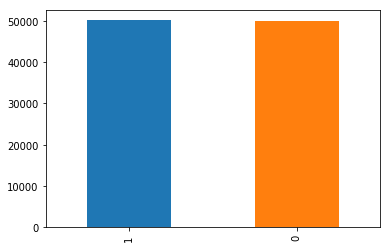

In [73]:
clean_tweets_sample100k['label'].value_counts().plot(kind  = 'bar')

## Naive bayes with TF IDF - Sample of 10000

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [78]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['naive bayes']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [79]:
predictions = pipeline.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.70      0.70      1462
          1       0.71      0.72      0.72      1538

avg / total       0.71      0.71      0.71      3000



[[1020  442]
 [ 433 1105]]
0.7083333333333334


In [81]:
df_sample10000['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive bayes without TF IDF - Sample of 10000

In [82]:
cv = CountVectorizer(stop_words='english',max_features=10000)

In [83]:
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [85]:
t1 = time.clock()
print(t1)
nb.fit(X_train,y_train)
t2 = time.clock()
print(t2)
t3 =float(t2-t1)
df_sample10000['naive bayes']['time_without_tfidf'] = t3
df_sample10000.head()

1050.979587
1050.991249


,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,NaN,NaN,NaN,NaN
time_without_tfidf,0.011662,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [86]:
predictions = nb.predict(X_test)

In [87]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[36 15]
 [15 34]]
             precision    recall  f1-score   support

          0       0.71      0.71      0.71        51
          1       0.69      0.69      0.69        49

avg / total       0.70      0.70      0.70       100

0.7


In [88]:
df_sample10000['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,NaN,NaN,NaN,NaN
time_without_tfidf,0.011662,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.7,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 10,000

In [89]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample10000 = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [92]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['linear regression']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,NaN,NaN,NaN
time_without_tfidf,0.011662,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.7,NaN,NaN,NaN,NaN


In [93]:
predictions = pipeline.predict(X_test)

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.6738707333861776
Mean Squared error:  0.8280978370436889
R2 Score:  -2.3145185325129543


## Linear Regression without TF IDF - Sample of 10,000

In [95]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [96]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['linear regression']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,NaN,NaN,NaN
time_without_tfidf,0.011662,2.81624,NaN,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.7,NaN,NaN,NaN,NaN


In [97]:
predictions = lr.predict(X_test)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.8098334538242091
Mean Squared error:  1.3536430519252811
R2 Score:  -4.418049391399426


## Logistic Regression with TF IDF - Sample of 10,000

In [99]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [100]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [101]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['logistic regression']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,NaN,NaN
time_without_tfidf,0.011662,2.81624,NaN,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.7,NaN,NaN,NaN,NaN


In [102]:
predictions = pipeline.predict(X_test)

In [103]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.69      0.71      1462
          1       0.72      0.77      0.74      1538

avg / total       0.73      0.73      0.73      3000



[[1005  457]
 [ 360 1178]]
Accuracy is 0.7276666666666667


In [104]:
df_sample10000['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,NaN,NaN
time_without_tfidf,0.011662,2.81624,NaN,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,NaN,NaN
accuracy_without_tfidf,0.7,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 10,000

In [105]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [106]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['logistic regression']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,NaN,NaN
time_without_tfidf,0.011662,2.81624,0.26253,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,NaN,NaN
accuracy_without_tfidf,0.7,NaN,NaN,NaN,NaN


In [107]:
predictions = log_model.predict(X_test)

In [108]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[ 999  463]
 [ 374 1164]]
             precision    recall  f1-score   support

          0       0.73      0.68      0.70      1462
          1       0.72      0.76      0.74      1538

avg / total       0.72      0.72      0.72      3000

Accuracy is:  0.721


In [109]:
df_sample10000['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,NaN,NaN
time_without_tfidf,0.011662,2.81624,0.26253,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,NaN,NaN
accuracy_without_tfidf,0.7,NaN,0.721,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 10,000

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [112]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [113]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['random forest']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,0.799234,NaN
time_without_tfidf,0.011662,2.81624,0.26253,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,NaN,NaN
accuracy_without_tfidf,0.7,NaN,0.721,NaN,NaN


In [114]:
predictions = pipeline.predict(X_test)

In [115]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.69      0.66      0.67      1462
          1       0.69      0.71      0.70      1538

avg / total       0.69      0.69      0.69      3000



[[ 969  493]
 [ 444 1094]]
Accuracy is 0.6876666666666666


In [116]:
df_sample10000['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,0.799234,NaN
time_without_tfidf,0.011662,2.81624,0.26253,NaN,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,0.687667,NaN
accuracy_without_tfidf,0.7,NaN,0.721,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 10,000

In [117]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [118]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['random forest']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,0.799234,NaN
time_without_tfidf,0.011662,2.81624,0.26253,1.93429,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,0.687667,NaN
accuracy_without_tfidf,0.7,NaN,0.721,NaN,NaN


In [119]:
predictions = rf.predict(X_test)

In [120]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[ 956  506]
 [ 425 1113]]
             precision    recall  f1-score   support

          0       0.69      0.65      0.67      1462
          1       0.69      0.72      0.71      1538

avg / total       0.69      0.69      0.69      3000

Accuracy is:  0.6896666666666667


In [121]:
df_sample10000['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,0.799234,NaN
time_without_tfidf,0.011662,2.81624,0.26253,1.93429,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,0.687667,NaN
accuracy_without_tfidf,0.7,NaN,0.721,0.689667,NaN


## Support Vector Machines with TF IDF - Sample of 10,000

In [122]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [124]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [125]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['svm']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,0.799234,5.84272
time_without_tfidf,0.011662,2.81624,0.26253,1.93429,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,0.687667,NaN
accuracy_without_tfidf,0.7,NaN,0.721,0.689667,NaN


In [126]:
predictions = pipeline.predict(X_test)

In [127]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1462
          1       0.51      1.00      0.68      1538

avg / total       0.26      0.51      0.35      3000



[[   0 1462]
 [   0 1538]]
Accuracy is 0.5126666666666667


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
df_sample10000['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,0.799234,5.84272
time_without_tfidf,0.011662,2.81624,0.26253,1.93429,NaN
accuracy_with_tfidf,0.708333,NaN,0.727667,0.687667,0.512667
accuracy_without_tfidf,0.7,NaN,0.721,0.689667,NaN


## Support Vector Machines without tfidf - Sample of 10,000

In [129]:
model = SVC()

In [130]:
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [131]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['svm']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,0.799234,5.84272
time_without_tfidf,0.011662,2.81624,0.26253,1.93429,4.41681
accuracy_with_tfidf,0.708333,NaN,0.727667,0.687667,0.512667
accuracy_without_tfidf,0.7,NaN,0.721,0.689667,NaN


In [132]:
predictions = model.predict(X_test)

In [133]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[   0 1462]
 [   0 1538]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1462
          1       0.51      1.00      0.68      1538

avg / total       0.26      0.51      0.35      3000

Accuracy is:  0.5126666666666667


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
df_sample10000['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.122759,1.43259,0.379224,0.799234,5.84272
time_without_tfidf,0.011662,2.81624,0.26253,1.93429,4.41681
accuracy_with_tfidf,0.708333,NaN,0.727667,0.687667,0.512667
accuracy_without_tfidf,0.7,NaN,0.721,0.689667,0.512667


## Naive bayes with TF IDF - Sample of 60k

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [136]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [139]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['naive bayes']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [140]:
predictions = pipeline.predict(X_test)

In [141]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.72      0.75      0.74      8874
          1       0.75      0.71      0.73      9126

avg / total       0.73      0.73      0.73     18000



[[6697 2177]
 [2607 6519]]
0.7342222222222222


In [142]:
df_sample60k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 60k

In [143]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [144]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [146]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['naive bayes']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,NaN,NaN,NaN,NaN
time_without_tfidf,0.019572,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [147]:
predictions = nb.predict(X_test)

In [148]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[232  62]
 [ 78 228]]
             precision    recall  f1-score   support

          0       0.75      0.79      0.77       294
          1       0.79      0.75      0.77       306

avg / total       0.77      0.77      0.77       600

0.7666666666666667


In [149]:
df_sample60k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,NaN,NaN,NaN,NaN
time_without_tfidf,0.019572,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.766667,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 60k

In [150]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [152]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [153]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['linear regression']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,NaN,NaN,NaN
time_without_tfidf,0.019572,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.766667,NaN,NaN,NaN,NaN


In [154]:
predictions = pipeline.predict(X_test)

In [155]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.37740052010355396
Mean Squared error:  0.21508659901867133
R2 Score:  0.13948494297413772


## Linear Regression without TF IDF - Sample of 60k

In [156]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [157]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['linear regression']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,NaN,NaN,NaN
time_without_tfidf,0.019572,3.7046,NaN,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.766667,NaN,NaN,NaN,NaN


In [158]:
predictions = lr.predict(X_test)

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.410189210119421
Mean Squared error:  0.2523310951862715
R2 Score:  -0.009522247105518522


## Logistic Regression with TF IDF - Sample of 60k

In [160]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [161]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [162]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['logistic regression']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,NaN,NaN
time_without_tfidf,0.019572,3.7046,NaN,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.766667,NaN,NaN,NaN,NaN


In [163]:
predictions = pipeline.predict(X_test)

In [164]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.73      0.74      8874
          1       0.75      0.76      0.75      9126

avg / total       0.75      0.75      0.75     18000



[[6508 2366]
 [2169 6957]]
Accuracy is 0.7480555555555556


In [165]:
df_sample60k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,NaN,NaN
time_without_tfidf,0.019572,3.7046,NaN,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,NaN,NaN
accuracy_without_tfidf,0.766667,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 60k

In [166]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [167]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['logistic regression']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,NaN,NaN
time_without_tfidf,0.019572,3.7046,1.29926,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,NaN,NaN
accuracy_without_tfidf,0.766667,NaN,NaN,NaN,NaN


In [168]:
predictions = log_model.predict(X_test)

In [169]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[6432 2442]
 [2184 6942]]
             precision    recall  f1-score   support

          0       0.75      0.72      0.74      8874
          1       0.74      0.76      0.75      9126

avg / total       0.74      0.74      0.74     18000

Accuracy is:  0.743


In [170]:
df_sample60k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,NaN,NaN
time_without_tfidf,0.019572,3.7046,1.29926,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,NaN,NaN
accuracy_without_tfidf,0.766667,NaN,0.743,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 60k

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [173]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [174]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['random forest']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,9.45664,NaN
time_without_tfidf,0.019572,3.7046,1.29926,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,NaN,NaN
accuracy_without_tfidf,0.766667,NaN,0.743,NaN,NaN


In [175]:
predictions = pipeline.predict(X_test)

In [176]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.74      0.72      8874
          1       0.73      0.69      0.71      9126

avg / total       0.71      0.71      0.71     18000



[[6541 2333]
 [2844 6282]]
Accuracy is 0.7123888888888888


In [177]:
df_sample60k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,9.45664,NaN
time_without_tfidf,0.019572,3.7046,1.29926,NaN,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,0.712389,NaN
accuracy_without_tfidf,0.766667,NaN,0.743,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 60k

In [178]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [179]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['random forest']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,9.45664,NaN
time_without_tfidf,0.019572,3.7046,1.29926,9.58698,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,0.712389,NaN
accuracy_without_tfidf,0.766667,NaN,0.743,NaN,NaN


In [180]:
predictions = rf.predict(X_test)

In [181]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[6441 2433]
 [2793 6333]]
             precision    recall  f1-score   support

          0       0.70      0.73      0.71      8874
          1       0.72      0.69      0.71      9126

avg / total       0.71      0.71      0.71     18000

Accuracy is:  0.7096666666666667


In [182]:
df_sample60k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,9.45664,NaN
time_without_tfidf,0.019572,3.7046,1.29926,9.58698,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,0.712389,NaN
accuracy_without_tfidf,0.766667,NaN,0.743,0.709667,NaN


## Support Vector Machines with TF IDF - Sample of 60k

In [183]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [185]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [186]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['svm']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,9.45664,223.57
time_without_tfidf,0.019572,3.7046,1.29926,9.58698,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,0.712389,NaN
accuracy_without_tfidf,0.766667,NaN,0.743,0.709667,NaN


In [187]:
predictions = pipeline.predict(X_test)

In [188]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.49      1.00      0.66      8874
          1       0.00      0.00      0.00      9126

avg / total       0.24      0.49      0.33     18000



[[8874    0]
 [9126    0]]
Accuracy is 0.493


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [189]:
df_sample60k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,9.45664,223.57
time_without_tfidf,0.019572,3.7046,1.29926,9.58698,NaN
accuracy_with_tfidf,0.734222,NaN,0.748056,0.712389,0.493
accuracy_without_tfidf,0.766667,NaN,0.743,0.709667,NaN


## Support Vector Machines without tfidf - Sample of 60k

In [190]:
model = SVC()

In [191]:
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [192]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['svm']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,9.45664,223.57
time_without_tfidf,0.019572,3.7046,1.29926,9.58698,155.999
accuracy_with_tfidf,0.734222,NaN,0.748056,0.712389,0.493
accuracy_without_tfidf,0.766667,NaN,0.743,0.709667,NaN


In [193]:
predictions = model.predict(X_test)

In [194]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[8874    0]
 [9126    0]]
             precision    recall  f1-score   support

          0       0.49      1.00      0.66      8874
          1       0.00      0.00      0.00      9126

avg / total       0.24      0.49      0.33     18000

Accuracy is:  0.493


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [195]:
df_sample60k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.632737,2.81963,1.74998,9.45664,223.57
time_without_tfidf,0.019572,3.7046,1.29926,9.58698,155.999
accuracy_with_tfidf,0.734222,NaN,0.748056,0.712389,0.493
accuracy_without_tfidf,0.766667,NaN,0.743,0.709667,0.493


## Naive bayes with TF IDF - Sample of 80k

In [196]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [197]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [199]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [200]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['naive bayes']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [201]:
predictions = pipeline.predict(X_test)

In [202]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.74      0.74     12135
          1       0.73      0.75      0.74     11865

avg / total       0.74      0.74      0.74     24000



[[8932 3203]
 [3012 8853]]
0.7410416666666667


In [203]:
df_sample80k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 80k

In [204]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [205]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [207]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['naive bayes']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,NaN,NaN,NaN,NaN
time_without_tfidf,0.026955,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [208]:
predictions = nb.predict(X_test)

In [209]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[303 105]
 [ 91 301]]
             precision    recall  f1-score   support

          0       0.77      0.74      0.76       408
          1       0.74      0.77      0.75       392

avg / total       0.76      0.76      0.76       800

0.755


In [210]:
df_sample80k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,NaN,NaN,NaN,NaN
time_without_tfidf,0.026955,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 80k

In [211]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [213]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [214]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['linear regression']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,NaN,NaN,NaN
time_without_tfidf,0.026955,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


In [215]:
predictions = pipeline.predict(X_test)

In [216]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.3664702394031508
Mean Squared error:  0.19842618405308857
R2 Score:  0.2061947978167442


## Linear Regression without TF IDF - Sample of 80k

In [217]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [218]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['linear regression']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,NaN,NaN,NaN
time_without_tfidf,0.026955,4.23584,NaN,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


In [219]:
predictions = lr.predict(X_test)

In [220]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.39257303364981355
Mean Squared error:  0.2206764742505727
R2 Score:  0.11718237139158816


## Logistic Regression with TF IDF - Sample of 80k

In [221]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [222]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [223]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['logistic regression']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,NaN,NaN
time_without_tfidf,0.026955,4.23584,NaN,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


In [224]:
predictions = pipeline.predict(X_test)

In [225]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.73      0.75     12135
          1       0.74      0.77      0.75     11865

avg / total       0.75      0.75      0.75     24000



[[8905 3230]
 [2729 9136]]
Accuracy is 0.7517083333333333


In [226]:
df_sample80k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,NaN,NaN
time_without_tfidf,0.026955,4.23584,NaN,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 80k

In [227]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [228]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['logistic regression']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,NaN,NaN
time_without_tfidf,0.026955,4.23584,2.96939,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,NaN,NaN
accuracy_without_tfidf,0.755,NaN,NaN,NaN,NaN


In [229]:
predictions = log_model.predict(X_test)

In [230]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[8773 3362]
 [2741 9124]]
             precision    recall  f1-score   support

          0       0.76      0.72      0.74     12135
          1       0.73      0.77      0.75     11865

avg / total       0.75      0.75      0.75     24000

Accuracy is:  0.7457083333333333


In [231]:
df_sample80k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,NaN,NaN
time_without_tfidf,0.026955,4.23584,2.96939,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,NaN,NaN
accuracy_without_tfidf,0.755,NaN,0.745708,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 80k

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [234]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [235]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['random forest']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,13.2729,NaN
time_without_tfidf,0.026955,4.23584,2.96939,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,NaN,NaN
accuracy_without_tfidf,0.755,NaN,0.745708,NaN,NaN


In [236]:
predictions = pipeline.predict(X_test)

In [237]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.74      0.73     12135
          1       0.72      0.69      0.71     11865

avg / total       0.72      0.72      0.72     24000



[[9010 3125]
 [3650 8215]]
Accuracy is 0.7177083333333333


In [238]:
df_sample80k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,13.2729,NaN
time_without_tfidf,0.026955,4.23584,2.96939,NaN,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,0.717708,NaN
accuracy_without_tfidf,0.755,NaN,0.745708,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 80k

In [239]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [240]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['random forest']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,13.2729,NaN
time_without_tfidf,0.026955,4.23584,2.96939,14.4333,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,0.717708,NaN
accuracy_without_tfidf,0.755,NaN,0.745708,NaN,NaN


In [241]:
predictions = rf.predict(X_test)

In [242]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[8802 3333]
 [3494 8371]]
             precision    recall  f1-score   support

          0       0.72      0.73      0.72     12135
          1       0.72      0.71      0.71     11865

avg / total       0.72      0.72      0.72     24000

Accuracy is:  0.7155416666666666


In [243]:
df_sample80k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,13.2729,NaN
time_without_tfidf,0.026955,4.23584,2.96939,14.4333,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,0.717708,NaN
accuracy_without_tfidf,0.755,NaN,0.745708,0.715542,NaN


## Support Vector Machines with TF IDF - Sample of 80k

In [244]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [246]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [247]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['svm']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,13.2729,398.099
time_without_tfidf,0.026955,4.23584,2.96939,14.4333,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,0.717708,NaN
accuracy_without_tfidf,0.755,NaN,0.745708,0.715542,NaN


In [248]:
predictions = pipeline.predict(X_test)

In [249]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     12135
          1       0.49      1.00      0.66     11865

avg / total       0.24      0.49      0.33     24000



[[    0 12135]
 [    0 11865]]
Accuracy is 0.494375


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [250]:
df_sample80k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,13.2729,398.099
time_without_tfidf,0.026955,4.23584,2.96939,14.4333,NaN
accuracy_with_tfidf,0.741042,NaN,0.751708,0.717708,0.494375
accuracy_without_tfidf,0.755,NaN,0.745708,0.715542,NaN


## Support Vector Machines without tfidf - Sample of 80k

In [251]:
model = SVC()

In [252]:
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [253]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['svm']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,13.2729,398.099
time_without_tfidf,0.026955,4.23584,2.96939,14.4333,340.817
accuracy_with_tfidf,0.741042,NaN,0.751708,0.717708,0.494375
accuracy_without_tfidf,0.755,NaN,0.745708,0.715542,NaN


In [254]:
predictions = model.predict(X_test)

In [255]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[   14 12121]
 [    3 11862]]
             precision    recall  f1-score   support

          0       0.82      0.00      0.00     12135
          1       0.49      1.00      0.66     11865

avg / total       0.66      0.49      0.33     24000

Accuracy is:  0.49483333333333335


In [256]:
df_sample80k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.856819,2.86243,2.46256,13.2729,398.099
time_without_tfidf,0.026955,4.23584,2.96939,14.4333,340.817
accuracy_with_tfidf,0.741042,NaN,0.751708,0.717708,0.494375
accuracy_without_tfidf,0.755,NaN,0.745708,0.715542,0.494833


## Naive bayes with TF IDF - Sample of 100k

In [257]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [258]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [260]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [261]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['naive bayes']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [262]:
predictions = pipeline.predict(X_test)

In [263]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.74      0.74     14972
          1       0.74      0.75      0.75     15028

avg / total       0.74      0.74      0.74     30000



[[11039  3933]
 [ 3736 11292]]
0.7443666666666666


In [264]:
df_sample100k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 100k

In [265]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [266]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [268]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['naive bayes']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,NaN,NaN,NaN,NaN
time_without_tfidf,0.036935,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [269]:
predictions = nb.predict(X_test)

In [270]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[397 123]
 [109 371]]
             precision    recall  f1-score   support

          0       0.78      0.76      0.77       520
          1       0.75      0.77      0.76       480

avg / total       0.77      0.77      0.77      1000

0.768


In [271]:
df_sample100k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,NaN,NaN,NaN,NaN
time_without_tfidf,0.036935,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.768,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 100k

In [272]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [274]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [275]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['linear regression']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,NaN,NaN,NaN
time_without_tfidf,0.036935,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.768,NaN,NaN,NaN,NaN


In [276]:
predictions = pipeline.predict(X_test)

In [277]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.35961644163081014
Mean Squared error:  0.18960225774574468
R2 Score:  0.24158832637367844


## Linear Regression without TF IDF - Sample of 100k

In [278]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [279]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['linear regression']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,NaN,NaN,NaN
time_without_tfidf,0.036935,4.69332,NaN,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.768,NaN,NaN,NaN,NaN


In [280]:
predictions = lr.predict(X_test)

In [281]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.38334118871079614
Mean Squared error:  0.20662334844079566
R2 Score:  0.17350372635646816


## Logistic Regression with TF IDF - Sample of 100k

In [282]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [283]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [284]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['logistic regression']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,NaN,NaN
time_without_tfidf,0.036935,4.69332,NaN,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.768,NaN,NaN,NaN,NaN


In [285]:
predictions = pipeline.predict(X_test)

In [286]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.73      0.75     14972
          1       0.75      0.78      0.76     15028

avg / total       0.76      0.76      0.76     30000



[[10988  3984]
 [ 3349 11679]]
Accuracy is 0.7555666666666667


In [287]:
df_sample100k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,NaN,NaN
time_without_tfidf,0.036935,4.69332,NaN,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,NaN,NaN
accuracy_without_tfidf,0.768,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 100k

In [288]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [289]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['logistic regression']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,NaN,NaN
time_without_tfidf,0.036935,4.69332,2.34405,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,NaN,NaN
accuracy_without_tfidf,0.768,NaN,NaN,NaN,NaN


In [290]:
predictions = log_model.predict(X_test)

In [291]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[10832  4140]
 [ 3293 11735]]
             precision    recall  f1-score   support

          0       0.77      0.72      0.74     14972
          1       0.74      0.78      0.76     15028

avg / total       0.75      0.75      0.75     30000

Accuracy is:  0.7522333333333333


In [292]:
df_sample100k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,NaN,NaN
time_without_tfidf,0.036935,4.69332,2.34405,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,NaN,NaN
accuracy_without_tfidf,0.768,NaN,0.752233,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 100k

In [293]:
from sklearn.feature_extraction.text import CountVectorizer
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [295]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [296]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['random forest']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,18.604,NaN
time_without_tfidf,0.036935,4.69332,2.34405,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,NaN,NaN
accuracy_without_tfidf,0.768,NaN,0.752233,NaN,NaN


In [297]:
predictions = pipeline.predict(X_test)

In [298]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.74      0.73     14972
          1       0.73      0.70      0.72     15028

avg / total       0.72      0.72      0.72     30000



[[11148  3824]
 [ 4527 10501]]
Accuracy is 0.7216333333333333


In [299]:
df_sample100k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,18.604,NaN
time_without_tfidf,0.036935,4.69332,2.34405,NaN,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,0.721633,NaN
accuracy_without_tfidf,0.768,NaN,0.752233,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 100k

In [300]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [301]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['random forest']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,18.604,NaN
time_without_tfidf,0.036935,4.69332,2.34405,18.5233,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,0.721633,NaN
accuracy_without_tfidf,0.768,NaN,0.752233,NaN,NaN


In [302]:
predictions = rf.predict(X_test)

In [303]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[10927  4045]
 [ 4477 10551]]
             precision    recall  f1-score   support

          0       0.71      0.73      0.72     14972
          1       0.72      0.70      0.71     15028

avg / total       0.72      0.72      0.72     30000

Accuracy is:  0.7159333333333333


In [304]:
df_sample100k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,18.604,NaN
time_without_tfidf,0.036935,4.69332,2.34405,18.5233,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,0.721633,NaN
accuracy_without_tfidf,0.768,NaN,0.752233,0.715933,NaN


## Support Vector Machines with TF IDF - Sample of 100k

In [305]:
from sklearn.svm import SVC
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [307]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [308]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['svm']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,18.604,655.225
time_without_tfidf,0.036935,4.69332,2.34405,18.5233,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,0.721633,NaN
accuracy_without_tfidf,0.768,NaN,0.752233,0.715933,NaN


In [309]:
predictions = pipeline.predict(X_test)

In [310]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     14972
          1       0.50      1.00      0.67     15028

avg / total       0.25      0.50      0.33     30000



[[    0 14972]
 [    0 15028]]
Accuracy is 0.5009333333333333


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [311]:
df_sample100k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,18.604,655.225
time_without_tfidf,0.036935,4.69332,2.34405,18.5233,NaN
accuracy_with_tfidf,0.744367,NaN,0.755567,0.721633,0.500933
accuracy_without_tfidf,0.768,NaN,0.752233,0.715933,NaN


## Support Vector Machines without tfidf - Sample of 100k

In [312]:
model = SVC()

In [313]:
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [314]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['svm']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,18.604,655.225
time_without_tfidf,0.036935,4.69332,2.34405,18.5233,681.23
accuracy_with_tfidf,0.744367,NaN,0.755567,0.721633,0.500933
accuracy_without_tfidf,0.768,NaN,0.752233,0.715933,NaN


In [315]:
predictions = model.predict(X_test)

In [316]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[  345 14627]
 [   43 14985]]
             precision    recall  f1-score   support

          0       0.89      0.02      0.04     14972
          1       0.51      1.00      0.67     15028

avg / total       0.70      0.51      0.36     30000

Accuracy is:  0.511


In [317]:
df_sample100k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.16909,4.54327,2.15802,18.604,655.225
time_without_tfidf,0.036935,4.69332,2.34405,18.5233,681.23
accuracy_with_tfidf,0.744367,NaN,0.755567,0.721633,0.500933
accuracy_without_tfidf,0.768,NaN,0.752233,0.715933,0.511


## Final Analysis for Sample  of 10,000

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, naive bayes to svm
Data columns (total 9 columns):
time_with_tfidf                     5 non-null object
time_without_tfidf                  5 non-null object
accuracy_with_tfidf                 4 non-null object
accuracy_without_tfidf              4 non-null object
Time_to_Fit_Without_TFIDF_log       5 non-null float64
Time_to_Fit_With_TFIDF_log          5 non-null float64
Time_to_Fit_Without_TFIDF_string    5 non-null object
Time_to_Fit_With_TFIDF_string       5 non-null object
Model                               5 non-null object
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


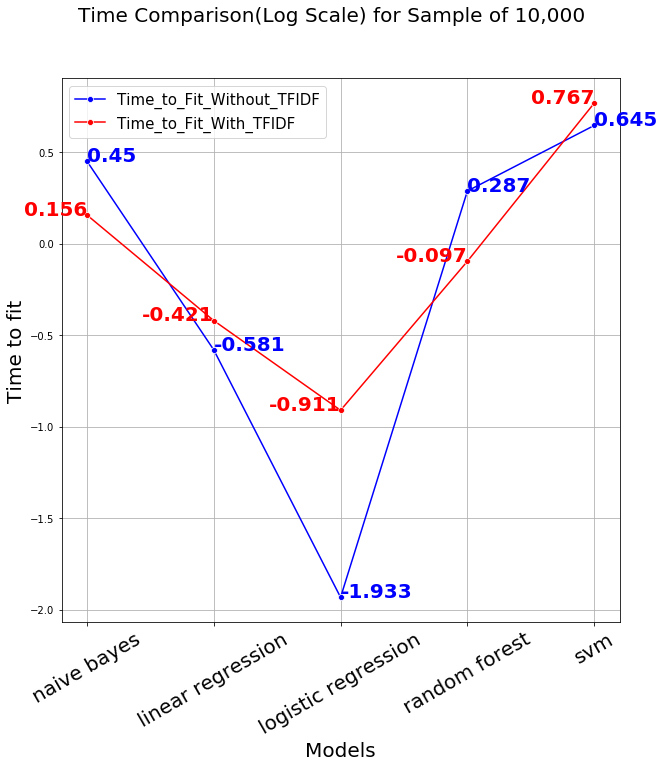

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create dataframe

df_sample10000.loc['Time_to_Fit_Without_TFIDF_log']= df_sample10000.loc['time_without_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample10000.loc['Time_to_Fit_With_TFIDF_log']= df_sample10000.loc['time_with_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample10000.loc['Time_to_Fit_Without_TFIDF_string']=df_sample10000.loc['Time_to_Fit_Without_TFIDF_log'].apply(str)
df_sample10000.loc['Time_to_Fit_With_TFIDF_string']=df_sample10000.loc['Time_to_Fit_With_TFIDF_log'].apply(str)

df_sample10000.head(10)

df_sample10000trans=df_sample10000.transpose()

df_sample10000trans['Model']=['naive bayes','linear regression','logistic regression', 'random forest', 'svm']

df_sample10000trans['Time_to_Fit_With_TFIDF_log'] = df_sample10000trans['Time_to_Fit_With_TFIDF_log'].map(lambda a: float(a))
df_sample10000trans['Time_to_Fit_Without_TFIDF_log'] = df_sample10000trans['Time_to_Fit_Without_TFIDF_log'].map(lambda a: float(a))

df_sample10000trans.info()

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Time Comparison(Log Scale) for Sample of 10,000', fontsize=20)
# basic plot
# p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log")

p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log", color="blue", label="Time_to_Fit_Without_TFIDF", linestyle="-", marker = 'o')
p2 = sns.lineplot(data=df_sample10000trans, x= 'Model', y="Time_to_Fit_With_TFIDF_log", color="red", label="Time_to_Fit_With_TFIDF", linestyle="-", marker ='o', ci = 68)


# add annotations one by one with a loop
for line in range(0,df_sample10000trans.shape[0]):
 p1.text(df_sample10000trans.index[line], df_sample10000trans.Time_to_Fit_Without_TFIDF_log[line],df_sample10000trans.Time_to_Fit_Without_TFIDF_string[line], horizontalalignment='left', size='medium', color='blue', weight='semibold', fontsize = 20 )
 p2.text(df_sample10000trans.Model[line], df_sample10000trans.Time_to_Fit_With_TFIDF_log[line], df_sample10000trans.Time_to_Fit_With_TFIDF_string[line], horizontalalignment='right', size='medium', color='red', weight='semibold' ,fontsize = 20 )
 p1.set_xticklabels(rotation=30, labels=df_sample10000trans['Model'], fontsize=20)

ax.set_xlabel(xlabel='Models', fontsize=20)
ax.set_ylabel(ylabel='Time to fit',fontsize=20)
ax.grid()
ax.legend(fontsize = 15)
#%matplotlib inline

In [391]:
df_sample10000trans.drop(index='linear regression', inplace=True)

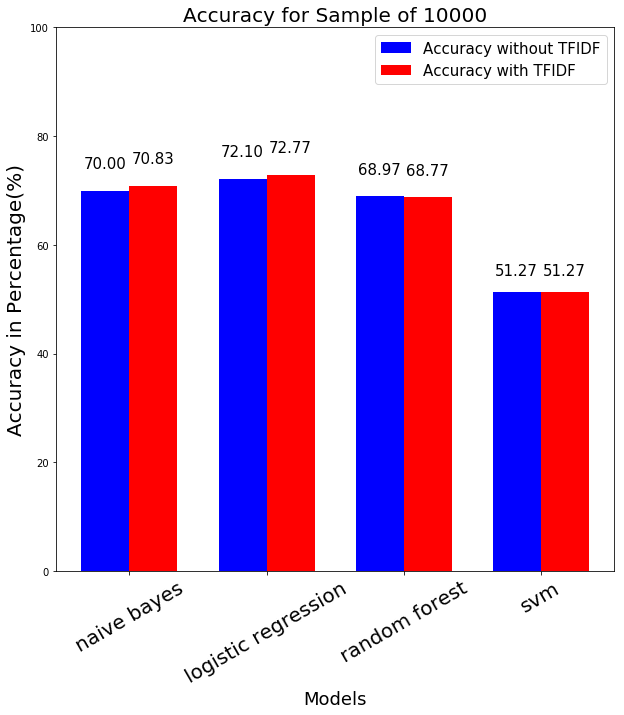

In [399]:
import numpy as np
import matplotlib.pyplot as plt

X = df_sample10000trans['Model']
Y = df_sample10000trans['accuracy_without_tfidf'].apply(lambda a: float(a*100))
Z = df_sample10000trans['accuracy_with_tfidf'].apply(lambda a: float(a*100))
_X = np.arange(len(X))



# N = 5
# men_means = (20, 35, 30, 35, 27)
# men_std = (2, 3, 4, 1, 2)

# ind = np.arange(N)  # the x locations for the groups
# width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize = (10,10))
rects1 = ax.bar(_X, Y, 0.35, color='blue')

# women_means = (25, 32, 34, 20, 25)
# women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(_X + 0.35, Z, 0.35, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy in Percentage(%)', fontsize=20)
ax.set_xlabel('Models', fontsize=18)
ax.set_title('Accuracy for Sample of 10000', fontsize=20)
ax.set_xticks(_X + 0.35 / 2)
ax.set_xticklabels(df_sample10000trans['Model'], rotation=30, fontsize=20)
ax.set_ylim(0,100)
ax.legend((rects1[0], rects2[0]), ('Accuracy without TFIDF', 'Accuracy with TFIDF'), fontsize = 15)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.05*height,'%.2f' % float(height),ha='center', va='bottom', fontsize=15)

autolabel(rects1)
autolabel(rects2)

plt.show()

## Analysis for Sample of 60K

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, naive bayes to svm
Data columns (total 9 columns):
time_with_tfidf                     5 non-null object
time_without_tfidf                  5 non-null object
accuracy_with_tfidf                 4 non-null object
accuracy_without_tfidf              4 non-null object
Time_to_Fit_Without_TFIDF_log       5 non-null float64
Time_to_Fit_With_TFIDF_log          5 non-null float64
Time_to_Fit_Without_TFIDF_string    5 non-null object
Time_to_Fit_With_TFIDF_string       5 non-null object
Model                               5 non-null object
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


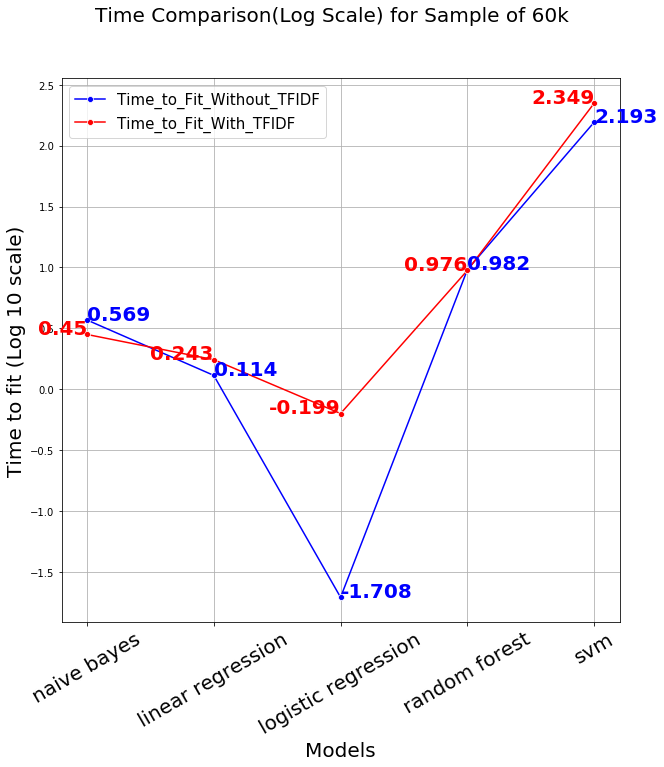

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create dataframe

df_sample60k.loc['Time_to_Fit_Without_TFIDF_log']= df_sample60k.loc['time_without_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample60k.loc['Time_to_Fit_With_TFIDF_log']= df_sample60k.loc['time_with_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample60k.loc['Time_to_Fit_Without_TFIDF_string']=df_sample60k.loc['Time_to_Fit_Without_TFIDF_log'].apply(str)
df_sample60k.loc['Time_to_Fit_With_TFIDF_string']=df_sample60k.loc['Time_to_Fit_With_TFIDF_log'].apply(str)

df_sample60k.head(10)

df_sample60ktrans=df_sample60k.transpose()

df_sample60ktrans['Model']=['naive bayes','linear regression','logistic regression', 'random forest', 'svm']

df_sample60ktrans['Time_to_Fit_With_TFIDF_log'] = df_sample60ktrans['Time_to_Fit_With_TFIDF_log'].map(lambda a: float(a))
df_sample60ktrans['Time_to_Fit_Without_TFIDF_log'] = df_sample60ktrans['Time_to_Fit_Without_TFIDF_log'].map(lambda a: float(a))

df_sample60ktrans.info()

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Time Comparison(Log Scale) for Sample of 60k', fontsize=20)
# basic plot
# p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log")

p1 = sns.lineplot(data=df_sample60ktrans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log", color="blue", label="Time_to_Fit_Without_TFIDF", linestyle="-", marker = 'o')
p2 = sns.lineplot(data=df_sample60ktrans, x= 'Model', y="Time_to_Fit_With_TFIDF_log", color="red", label="Time_to_Fit_With_TFIDF", linestyle="-", marker ='o', ci = 68)


# add annotations one by one with a loop
for line in range(0,df_sample60ktrans.shape[0]):
 p1.text(df_sample60ktrans.index[line], df_sample60ktrans.Time_to_Fit_Without_TFIDF_log[line],df_sample60ktrans.Time_to_Fit_Without_TFIDF_string[line], horizontalalignment='left', size='medium', color='blue', weight='semibold', fontsize = 20 )
 p2.text(df_sample60ktrans.Model[line], df_sample60ktrans.Time_to_Fit_With_TFIDF_log[line], df_sample60ktrans.Time_to_Fit_With_TFIDF_string[line], horizontalalignment='right', size='medium', color='red', weight='semibold' ,fontsize = 20 )
 p1.set_xticklabels(rotation=30, labels=df_sample60ktrans['Model'], fontsize=20)

ax.set_xlabel(xlabel='Models', fontsize=20)
ax.set_ylabel(ylabel='Time to fit (Log 10 scale)',fontsize=20)
ax.grid()
ax.legend(fontsize=15)
#%matplotlib inline

In [402]:
df_sample60ktrans.drop(index='linear regression', inplace=True)

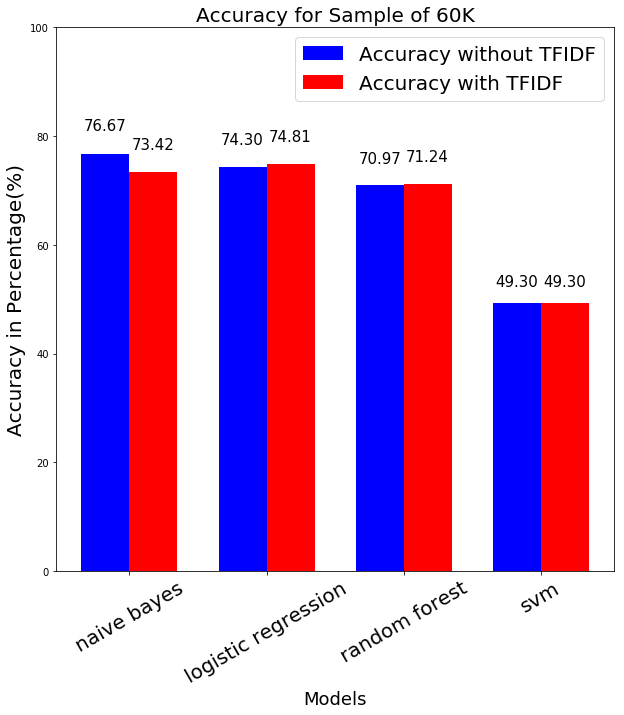

In [404]:
import numpy as np
import matplotlib.pyplot as plt

X = df_sample60ktrans['Model']
Y = df_sample60ktrans['accuracy_without_tfidf'].apply(lambda a: float(a*100))
Z = df_sample60ktrans['accuracy_with_tfidf'].apply(lambda a: float(a*100))
_X = np.arange(len(X))


fig, ax = plt.subplots(figsize = (10,10))
rects1 = ax.bar(_X, Y, 0.35, color='blue')

rects2 = ax.bar(_X + 0.35, Z, 0.35, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy in Percentage(%)', fontsize=20)
ax.set_xlabel('Models', fontsize=18)
ax.set_title('Accuracy for Sample of 60K', fontsize=20)
ax.set_xticks(_X + 0.35 / 2)
ax.set_xticklabels(df_sample60ktrans['Model'], rotation=30, fontsize=20)
ax.set_ylim(0,100)
ax.legend((rects1[0], rects2[0]), ('Accuracy without TFIDF', 'Accuracy with TFIDF'),fontsize=20)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.05*height,'%.2f' % float(height),ha='center', va='bottom', fontsize=15)

autolabel(rects1)
autolabel(rects2)

plt.show()

## Analysis for Sample of 80K

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, naive bayes to svm
Data columns (total 9 columns):
time_with_tfidf                     5 non-null object
time_without_tfidf                  5 non-null object
accuracy_with_tfidf                 4 non-null object
accuracy_without_tfidf              4 non-null object
Time_to_Fit_Without_TFIDF_log       5 non-null float64
Time_to_Fit_With_TFIDF_log          5 non-null float64
Time_to_Fit_Without_TFIDF_string    5 non-null object
Time_to_Fit_With_TFIDF_string       5 non-null object
Model                               5 non-null object
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


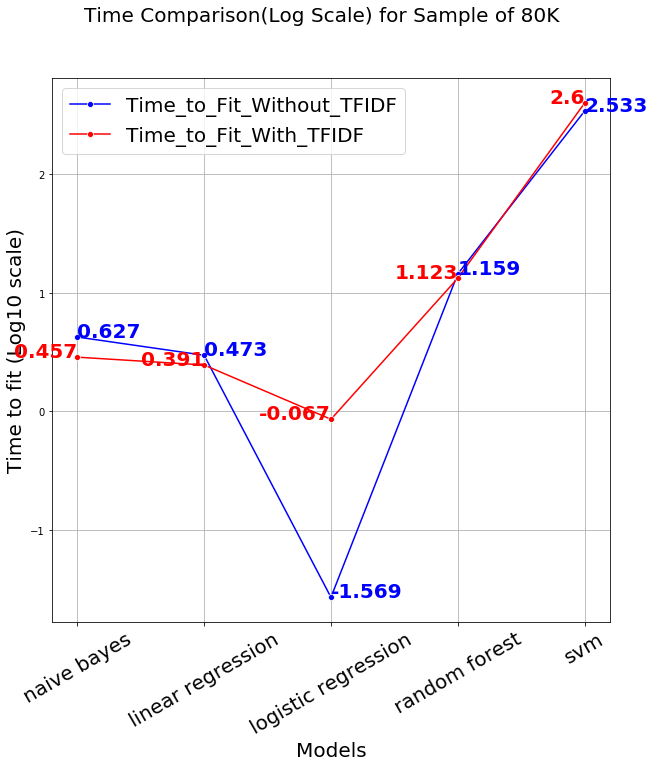

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create dataframe

df_sample80k.loc['Time_to_Fit_Without_TFIDF_log']= df_sample80k.loc['time_without_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample80k.loc['Time_to_Fit_With_TFIDF_log']= df_sample80k.loc['time_with_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample80k.loc['Time_to_Fit_Without_TFIDF_string']=df_sample80k.loc['Time_to_Fit_Without_TFIDF_log'].apply(str)
df_sample80k.loc['Time_to_Fit_With_TFIDF_string']=df_sample80k.loc['Time_to_Fit_With_TFIDF_log'].apply(str)

df_sample80k.head(10)

df_sample80ktrans=df_sample80k.transpose()

df_sample80ktrans['Model']=['naive bayes','linear regression','logistic regression', 'random forest', 'svm']

df_sample80ktrans['Time_to_Fit_With_TFIDF_log'] = df_sample80ktrans['Time_to_Fit_With_TFIDF_log'].map(lambda a: float(a))
df_sample80ktrans['Time_to_Fit_Without_TFIDF_log'] = df_sample80ktrans['Time_to_Fit_Without_TFIDF_log'].map(lambda a: float(a))

df_sample80ktrans.info()

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Time Comparison(Log Scale) for Sample of 80K', fontsize=20)
# basic plot
# p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log")

p1 = sns.lineplot(data=df_sample80ktrans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log", color="blue", label="Time_to_Fit_Without_TFIDF", linestyle="-", marker = 'o')
p2 = sns.lineplot(data=df_sample80ktrans, x= 'Model', y="Time_to_Fit_With_TFIDF_log", color="red", label="Time_to_Fit_With_TFIDF", linestyle="-", marker ='o', ci = 68)


# add annotations one by one with a loop
for line in range(0,df_sample80ktrans.shape[0]):
 p1.text(df_sample80ktrans.index[line], df_sample80ktrans.Time_to_Fit_Without_TFIDF_log[line],df_sample80ktrans.Time_to_Fit_Without_TFIDF_string[line], horizontalalignment='left', size='medium', color='blue', weight='semibold', fontsize = 20 )
 p2.text(df_sample80ktrans.Model[line], df_sample80ktrans.Time_to_Fit_With_TFIDF_log[line], df_sample80ktrans.Time_to_Fit_With_TFIDF_string[line], horizontalalignment='right', size='medium', color='red', weight='semibold' ,fontsize = 20 )
 p1.set_xticklabels(rotation=30, labels=df_sample80ktrans['Model'], fontsize=20)

ax.set_xlabel(xlabel='Models', fontsize=20)
ax.set_ylabel(ylabel='Time to fit (Log10 scale)',fontsize=20)
ax.grid()
ax.legend(fontsize=20)
#%matplotlib inline

In [407]:
df_sample80ktrans.drop(index='linear regression', inplace=True)

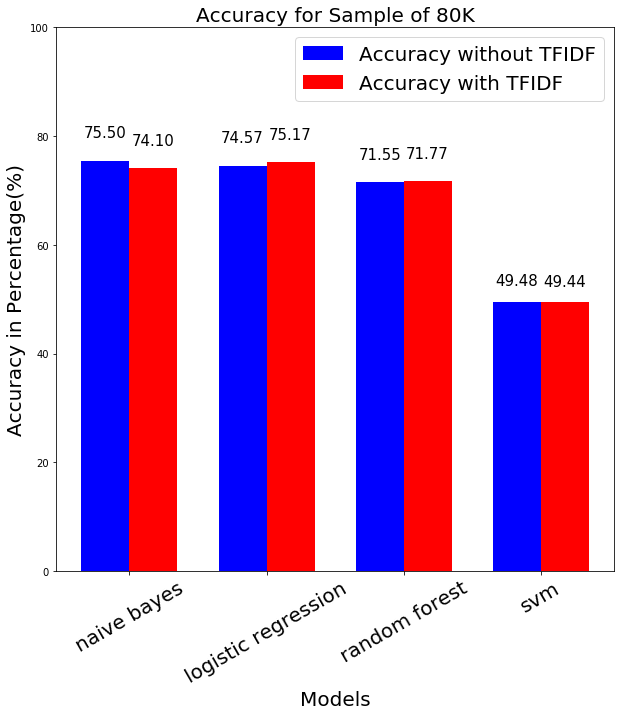

In [408]:
import numpy as np
import matplotlib.pyplot as plt

X = df_sample80ktrans['Model']
Y = df_sample80ktrans['accuracy_without_tfidf'].apply(lambda a: float(a*100))
Z = df_sample80ktrans['accuracy_with_tfidf'].apply(lambda a: float(a*100))
_X = np.arange(len(X))


fig, ax = plt.subplots(figsize = (10,10))
rects1 = ax.bar(_X, Y, 0.35, color='blue')

rects2 = ax.bar(_X + 0.35, Z, 0.35, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy in Percentage(%)', fontsize=20)
ax.set_xlabel('Models', fontsize=20)
ax.set_title('Accuracy for Sample of 80K', fontsize=20)
ax.set_xticks(_X + 0.35 / 2)
ax.set_xticklabels(df_sample80ktrans['Model'], rotation=30, fontsize=20)
ax.set_ylim(0,100)
ax.legend((rects1[0], rects2[0]), ('Accuracy without TFIDF', 'Accuracy with TFIDF'), fontsize=20)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.05*height,'%.2f' % float(height),ha='center', va='bottom', fontsize=15)

autolabel(rects1)
autolabel(rects2)

plt.show()

## Analysis for Sample of 100K

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, naive bayes to svm
Data columns (total 9 columns):
time_with_tfidf                     5 non-null object
time_without_tfidf                  5 non-null object
accuracy_with_tfidf                 4 non-null object
accuracy_without_tfidf              4 non-null object
Time_to_Fit_Without_TFIDF_log       5 non-null float64
Time_to_Fit_With_TFIDF_log          5 non-null float64
Time_to_Fit_Without_TFIDF_string    5 non-null object
Time_to_Fit_With_TFIDF_string       5 non-null object
Model                               5 non-null object
dtypes: float64(2), object(7)
memory usage: 560.0+ bytes


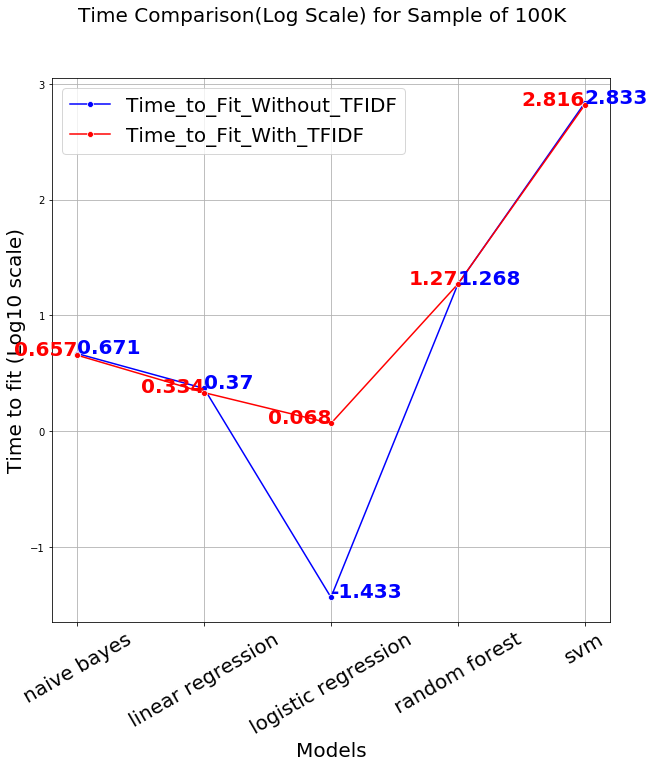

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create dataframe

df_sample100k.loc['Time_to_Fit_Without_TFIDF_log']= df_sample100k.loc['time_without_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample100k.loc['Time_to_Fit_With_TFIDF_log']= df_sample100k.loc['time_with_tfidf'].map(lambda a: round(np.log10(a),3))
df_sample100k.loc['Time_to_Fit_Without_TFIDF_string']=df_sample100k.loc['Time_to_Fit_Without_TFIDF_log'].apply(str)
df_sample100k.loc['Time_to_Fit_With_TFIDF_string']=df_sample100k.loc['Time_to_Fit_With_TFIDF_log'].apply(str)

df_sample100k.head(10)

df_sample100ktrans=df_sample100k.transpose()

df_sample100ktrans['Model']=['naive bayes','linear regression','logistic regression', 'random forest', 'svm']

df_sample100ktrans['Time_to_Fit_With_TFIDF_log'] = df_sample100ktrans['Time_to_Fit_With_TFIDF_log'].map(lambda a: float(a))
df_sample100ktrans['Time_to_Fit_Without_TFIDF_log'] = df_sample100ktrans['Time_to_Fit_Without_TFIDF_log'].map(lambda a: float(a))

df_sample100ktrans.info()

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Time Comparison(Log Scale) for Sample of 100K', fontsize=20)
# basic plot
# p1 = sns.lineplot(data=df_sample10000trans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log")

p1 = sns.lineplot(data=df_sample100ktrans, x= 'Model',y="Time_to_Fit_Without_TFIDF_log", color="blue", label="Time_to_Fit_Without_TFIDF", linestyle="-", marker = 'o')
p2 = sns.lineplot(data=df_sample100ktrans, x= 'Model', y="Time_to_Fit_With_TFIDF_log", color="red", label="Time_to_Fit_With_TFIDF", linestyle="-", marker ='o', ci = 68)


# add annotations one by one with a loop
for line in range(0,df_sample100ktrans.shape[0]):
 p1.text(df_sample100ktrans.index[line], df_sample100ktrans.Time_to_Fit_Without_TFIDF_log[line],df_sample100ktrans.Time_to_Fit_Without_TFIDF_string[line], horizontalalignment='left', size='medium', color='blue', weight='semibold', fontsize = 20 )
 p2.text(df_sample100ktrans.Model[line], df_sample100ktrans.Time_to_Fit_With_TFIDF_log[line], df_sample100ktrans.Time_to_Fit_With_TFIDF_string[line], horizontalalignment='right', size='medium', color='red', weight='semibold' ,fontsize = 20 )
 p1.set_xticklabels(rotation=30, labels=df_sample100ktrans['Model'], fontsize=20)

ax.set_xlabel(xlabel='Models', fontsize=20)
ax.set_ylabel(ylabel='Time to fit (Log10 scale)',fontsize=20)
ax.grid()
ax.legend(fontsize=20)
#%matplotlib inline

In [410]:
df_sample100ktrans.drop(index='linear regression', inplace=True)

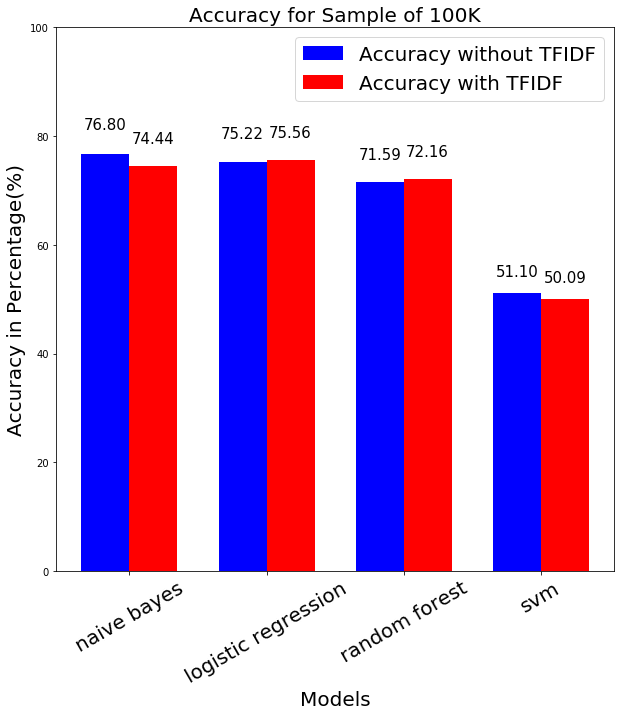

In [411]:
import numpy as np
import matplotlib.pyplot as plt

X = df_sample100ktrans['Model']
Y = df_sample100ktrans['accuracy_without_tfidf'].apply(lambda a: float(a*100))
Z = df_sample100ktrans['accuracy_with_tfidf'].apply(lambda a: float(a*100))
_X = np.arange(len(X))


fig, ax = plt.subplots(figsize = (10,10))
rects1 = ax.bar(_X, Y, 0.35, color='blue')

rects2 = ax.bar(_X + 0.35, Z, 0.35, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy in Percentage(%)', fontsize=20)
ax.set_xlabel('Models', fontsize=20)
ax.set_title('Accuracy for Sample of 100K', fontsize=20)
ax.set_xticks(_X + 0.35 / 2)
ax.set_xticklabels(df_sample100ktrans['Model'], rotation=30, fontsize=20)
ax.set_ylim(0,100)
ax.legend((rects1[0], rects2[0]), ('Accuracy without TFIDF', 'Accuracy with TFIDF'),fontsize = 20)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.05*height,'%.2f' % float(height),ha='center', va='bottom', fontsize=15)

autolabel(rects1)
autolabel(rects2)

plt.show()